In [1]:
import functions
import scipy
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter, stft
from hosd_python.hosd import apply_hosd # library that I converted from MATLAB
from copy import deepcopy
import scipy.stats as stats


In [2]:
no_ica_chans = 18
fs=1000
span = 10*fs
offset = 100*fs 
ms2s = lambda x, _:f'{x/1000:g}' 
window_size=int(1400) # used for higher-order-spectral filtering
time_axis=np.linspace(0,int(window_size)-1,num=int(window_size))

In [3]:

data = functions.array_from_TDMSgroup("patients/P044/P044_S01_D2024-04-18_G36.tdms", "R001")
filtered_data = functions.butter_filter(data)
copied_data = deepcopy(data)

In [40]:
def calc_stft(data, freq_limit=500):
    f, t_stft, Zxx = stft(data, fs=1000, nperseg=2, noverlap=1)

    S_magnitude_db = 20 * np.log10(np.abs(Zxx) + 1e-6)  # Add a small value to avoid log(0)\
    return f, t_stft, S_magnitude_db

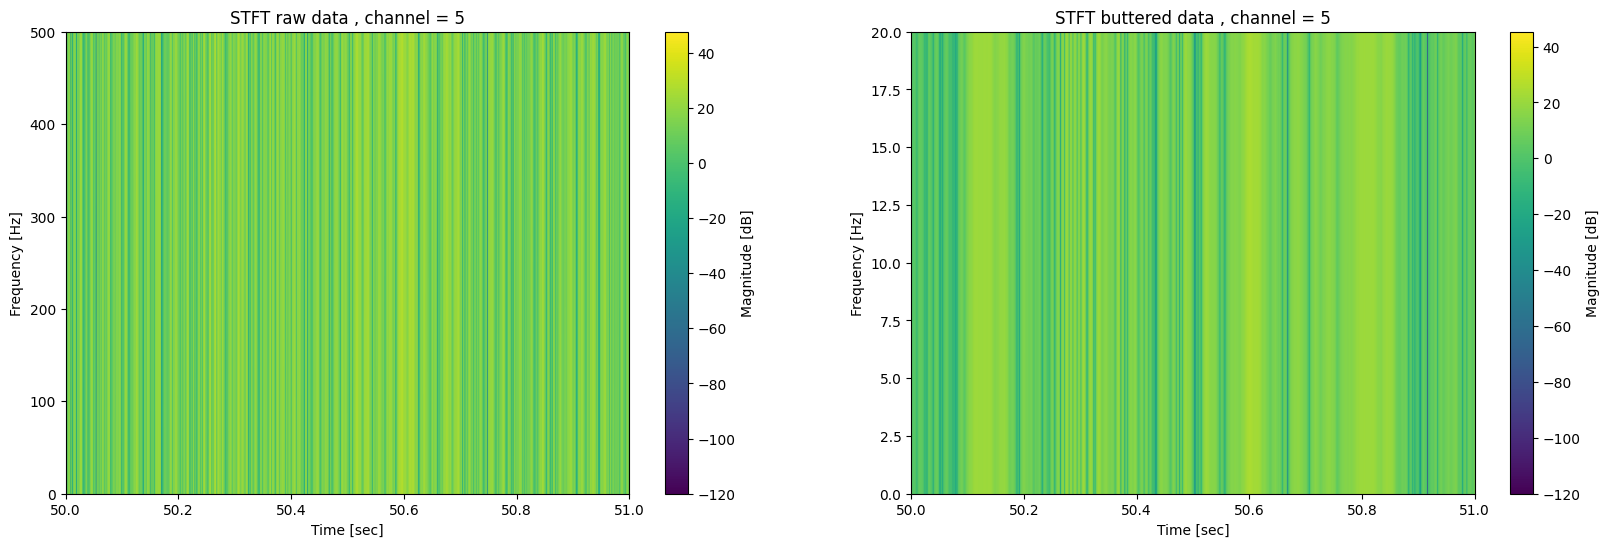

In [41]:
channel = 5

f, t, S = calc_stft(data[:, channel], freq_limit)
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.pcolormesh(t, f, S, shading='gouraud')
plt.title(f'STFT raw data , channel = {channel}')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(50,51)
plt.colorbar(label='Magnitude [dB]')

f_filt, t_filt, S_filt = calc_stft(filtered_data[:, channel], freq_limit)
plt.subplot(1,2,2)
plt.pcolormesh(t_filt, f_filt, S_filt, shading='gouraud')
plt.title(f'STFT buttered data , channel = {channel}')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.xlim(50,51)
plt.ylim(0,20)

plt.colorbar(label='Magnitude [dB]')
plt.show()



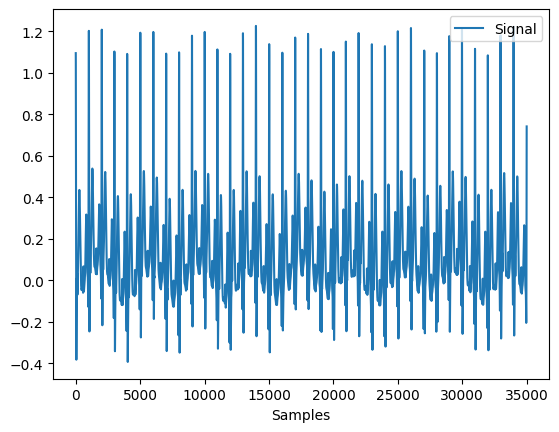

In [56]:
import neurokit2 as nk
maternal_clean = nk.ecg_simulate(duration=35, noise=0, heart_rate=60, sampling_rate=1000)
fetal_clean = 0.1*nk.ecg_simulate(duration=35, noise=0, heart_rate=120, sampling_rate=1000)
nk.signal_plot(maternal_clean+np.roll(fetal_clean, 100))

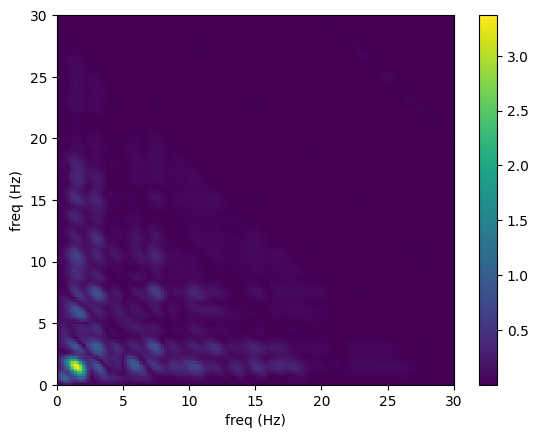

In [5]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import next_fast_len

from polycoherence import _plot_signal, polycoherence, plot_polycoherence

N = 10001
kw = dict(nperseg=N // 10, noverlap=N // 20, nfft=next_fast_len(N // 2))
freq1, freq2, bispec = polycoherence(data[5000:50000, 5], norm=None, fs=1000, **kw)

df1 = freq1[1] - freq1[0]
df2 = freq2[1] - freq2[0]
freq1 = np.append(freq1, freq1[-1] + df1) - 0.5 * df1
freq2 = np.append(freq2, freq2[-1] + df2) - 0.5 * df2
plt.figure()
plt.pcolormesh(freq2, freq1, np.abs(bispec))
plt.xlabel('freq (Hz)')
plt.ylabel('freq (Hz)')
plt.xlim(0,30)
plt.ylim(0,30)
plt.colorbar()

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

b, a = butter(5, [1, 30], btype='band', fs=1000)
data[5000:50000,5]= filtfilt(b, a, data[5000:50000,5])

# Plotting the results (example with bispectrum, adjust as needed)
N = len(filtered_data)
kw = dict(nperseg=N // 10, noverlap=N // 20, nfft=next_fast_len(N // 2))
freq1, freq2, bispec = polycoherence(data[5000:50000,5], norm=None, fs=fs, **kw)

# Adjust frequency bins
df1 = freq1[1] - freq1[0]
df2 = freq2[1] - freq2[0]
freq1 = np.append(freq1, freq1[-1] + df1) - 0.5 * df1
freq2 = np.append(freq2, freq2[-1] + df2) - 0.5 * df2

# Plot bispectrum
plt.figure()
plt.pcolormesh(freq2, freq1, np.abs(bispec))
plt.xlabel('freq (Hz)')
plt.ylabel('freq (Hz)')
plt.xlim(0, 30)
plt.ylim(0, 30)
plt.colorbar()
plt.show()


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/numpy/core/_asarray.py:106: RuntimeWarning: overflow encountered in cast
  return asanyarray(a, dtype=dtype)
